In [1]:
# This jupyter notebook is prepared by Jason Saini.

## Load Data and perform basic EDA

In [2]:
# import libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as msno
from scipy import stats

import sklearn

In [3]:
# import data into df and show row and column count
df = pd.read_csv("hrdata3.csv")
print("Number of rows: " + str(df.shape[0]))
print("Number of cols: " + str(df.shape[1]))

Number of rows: 12977
Number of cols: 8


In [4]:
df = df.drop(labels= ["Unnamed: 0"], axis = 1)

In [5]:
# show top 5 rows 
df.head()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
0,29725,0.776,15,2,5,47,0.0
1,666,0.767,21,2,4,8,0.0
2,28806,0.920,5,2,1,24,0.0
3,402,0.762,13,0,5,18,1.0
4,27107,0.920,7,2,1,46,1.0


In [6]:
# show last 5 rows
df.tail()

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target
12972,251,0.920,9,2,1,36,1.0
12973,32313,0.920,10,3,3,23,0.0
12974,29754,0.920,7,1,1,25,0.0
12975,24576,0.920,21,2,4,44,0.0
12976,5756,0.802,0,4,2,97,0.0


In [7]:
# check for null values
df.isnull().values.any()

False

### No null values

In [8]:
# check type of data in columns

In [9]:
df.dtypes

enrollee_id                 int64
city_development_index    float64
experience                  int64
company_size                int64
last_new_job                int64
training_hours              int64
target                    float64
dtype: object

### All columns are numeric

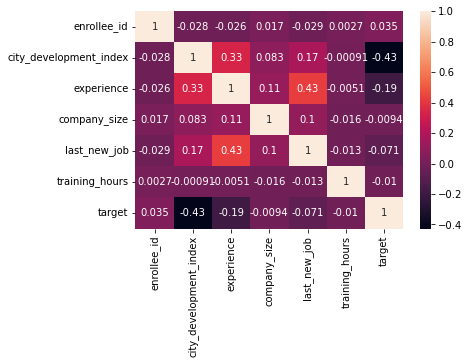

In [10]:
# heatmap with correlations
sns.heatmap(df.corr(), annot=True)
plt.show()

## Feature Selection & Pre-processing

In [11]:
# Put all the data into X except the enrollee_id and target cols
X = df.drop(labels = ["enrollee_id", "target"], axis = 1)
X

,city_development_index,experience,company_size,last_new_job,training_hours
0,0.776,15,2,5,47
1,0.767,21,2,4,8
2,0.920,5,2,1,24
3,0.762,13,0,5,18
4,0.920,7,2,1,46
...,...,...,...,...,...
12972,0.920,9,2,1,36
12973,0.920,10,3,3,23
12974,0.920,7,1,1,25
12975,0.920,21,2,4,44


In [12]:
# perform feature scaling with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)
X_scaled = scaler.transform(X)
X_inverse = inversed = scaler.inverse_transform(X_scaled)

In [13]:
# data after scaling
print(X_scaled)

[[-0.50342203  0.63395707 -0.5747232   1.69076217 -0.30839586]
 [-0.57841303  1.54600905 -0.5747232   1.08113696 -0.95180478]
 [ 0.69643399 -0.88612956 -0.5747232  -0.74773864 -0.68784215]
 ...
 [ 0.69643399 -0.58211224 -1.0314958  -0.74773864 -0.67134448]
 [ 0.69643399  1.54600905 -0.5747232   1.08113696 -0.35788885]
 [-0.28678136 -1.64617288  0.338822   -0.13811344  0.51648738]]


In [14]:
# inverse data
print(X_inverse)

[[ 0.776 15.     2.     5.    47.   ]
 [ 0.767 21.     2.     4.     8.   ]
 [ 0.92   5.     2.     1.    24.   ]
 ...
 [ 0.92   7.     1.     1.    25.   ]
 [ 0.92  21.     2.     4.    44.   ]
 [ 0.802  0.     4.     2.    97.   ]]


## K-Means Clustering

In [15]:
# perform K-means on scaled X
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2,  init='k-means++', random_state  = 47)
kmeans.fit(X_scaled)

identified_clusters = kmeans.fit_predict(X_scaled)

In [16]:
# show centers
centers = np.array(kmeans.cluster_centers_)
centers

array([[-0.31364817, -0.63941844, -0.15207764, -0.55076921,  0.01170319],
       [ 0.44177356,  0.90062111,  0.21420141,  0.77575864, -0.01648395]])

In [17]:
kmeans.fit_transform(X_inverse)
identified_clusters = kmeans.predict(X_inverse)

inverse_centers = np.array(kmeans.cluster_centers_)
centers

array([[-0.31364817, -0.63941844, -0.15207764, -0.55076921,  0.01170319],
       [ 0.44177356,  0.90062111,  0.21420141,  0.77575864, -0.01648395]])

In [18]:
# distance matrix
kmeans.transform(X_scaled)

array([[ 43.69151759, 168.00630426],
       [ 44.12758707, 168.59929545],
       [ 44.51209207, 168.50327225],
       ...,
       [ 44.45902944, 168.47687337],
       [ 43.52726139, 168.0005649 ],
       [ 43.47635774, 167.33315519]])

In [19]:
# labels
identfied_clusters = kmeans.labels_

In [20]:
# add cluster labels columns and assign for instances based on K-means label
df_with_clusters = df.copy()
df_with_clusters["cluster_labels"] = identified_clusters

In [21]:
# add a column for target values as int so we can compare to cluster labels
df_with_clusters["target_int"] = df_with_clusters["target"].astype(int)

In [22]:
df_with_clusters

,enrollee_id,city_development_index,experience,company_size,last_new_job,training_hours,target,cluster_labels,target_int
0,29725,0.776,15,2,5,47,0.0,0,0
1,666,0.767,21,2,4,8,0.0,0,0
2,28806,0.920,5,2,1,24,0.0,0,0
3,402,0.762,13,0,5,18,1.0,0,1
4,27107,0.920,7,2,1,46,1.0,0,1
...,...,...,...,...,...,...,...,...,...
12972,251,0.920,9,2,1,36,1.0,0,1
12973,32313,0.920,10,3,3,23,0.0,0,0
12974,29754,0.920,7,1,1,25,0.0,0,0
12975,24576,0.920,21,2,4,44,0.0,0,0


# compare cluster labels w/ ground truth

In [23]:
# via confusion amtrix
from sklearn.metrics import confusion_matrix
confusion_matrix(df_with_clusters["target_int"], df_with_clusters["cluster_labels"] )

array([[8657, 2038],
       [1865,  417]], dtype=int64)

In [24]:
# via classiciation report
from sklearn.metrics import classification_report
print(classification_report(df_with_clusters["target_int"], df_with_clusters["cluster_labels"]))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82     10695
           1       0.17      0.18      0.18      2282

    accuracy                           0.70     12977
   macro avg       0.50      0.50      0.50     12977
weighted avg       0.71      0.70      0.70     12977



In [25]:
# total_number of misclassifications
print("Number of misclassifications out of %d points: %d"
 % (X_scaled.shape[0], (df_with_clusters["target_int"] != df_with_clusters["cluster_labels"]).sum()))


Number of misclassifications out of 12977 points: 3903


In [26]:
# inertia of cluster
kmeans.inertia_

17054415.5567321

### Elbow method is a way of finding the best value for k (the number of centroids that we will use for K-means clustering)

In [27]:
# plot inertia for 2 - 20 clusters
inertias = []
for i in range(2,21):
    kmeans = KMeans(n_clusters = i,  init='k-means++', random_state  = 47)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia of kmeans')

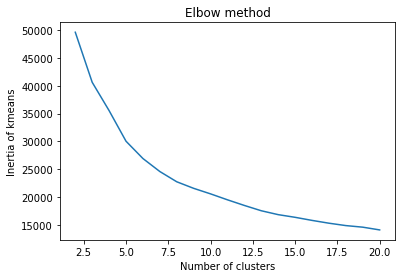

In [28]:
num_clusters = range(2,21)
plt.plot(num_clusters,inertias)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia of kmeans")

In [29]:
plt.show()

In [30]:
X_scaled

array([[-0.50342203,  0.63395707, -0.5747232 ,  1.69076217, -0.30839586],
       [-0.57841303,  1.54600905, -0.5747232 ,  1.08113696, -0.95180478],
       [ 0.69643399, -0.88612956, -0.5747232 , -0.74773864, -0.68784215],
       ...,
       [ 0.69643399, -0.58211224, -1.0314958 , -0.74773864, -0.67134448],
       [ 0.69643399,  1.54600905, -0.5747232 ,  1.08113696, -0.35788885],
       [-0.28678136, -1.64617288,  0.338822  , -0.13811344,  0.51648738]])

In [31]:
X_scaled.shape

(12977, 5)

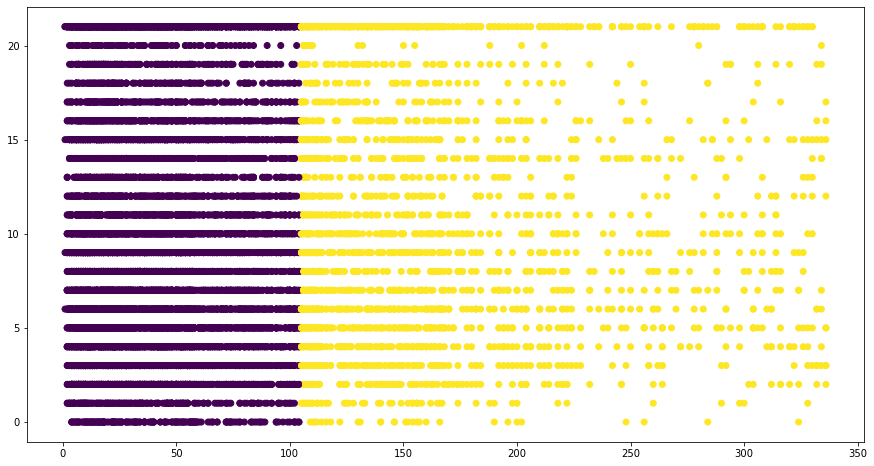

In [32]:
# scatter plot training hours against expereince based on 2 cluster labels
plt.figure(figsize = (15,8))
plt.scatter(df_with_clusters["training_hours"], df_with_clusters["experience"], c = df_with_clusters["cluster_labels"])

# Discussion:
THe line of separation for these clusters is almost non existent, we might need to use softmax regression in the future!

## Agglomerative Clustering

In [33]:
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
# scale data for dendogram
data_scaled = normalize(X)
data_scaled = pd.DataFrame(data_scaled, columns = X.columns)


In [ ]:
# plot dendogram 
plt.figure(figsize = (10,8))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method = "ward"))
plt.show()

In [ ]:
data_scaled.head()

In [ ]:
# perform agglomerative clustering with 2 clusters
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = 'ward')
ag_clusters = cluster.fit_predict(X_scaled)
ag_clusters

In [ ]:
# plot hours against training experience

plt.scatter(data_scaled["experience"], data_scaled["training_hours"], c = ag_clusters )

In [ ]:
# increase number of clusters to either 4 or 
plt.clf()
cluster = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = 'ward')
ag_clusters = cluster.fit_predict(X_scaled)
ag_clusters

plt.scatter(data_scaled["experience"], data_scaled["training_hours"], c = ag_clusters )